# Chapter 3. Text Data: Flattening, Filtering, and Chunking

In [1]:
import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Example 3-1. Computing n-grams

In [3]:
def load_json_df(filename, num_bytes = -1):
    '''Load the first `num_bytes` of the filename as a json blob, convert each line into a row in a Pandas data frame.'''
    # windows에서 실행하는 경우 기본 인코딩이 cp949 이므로 encoding 값 지정해야 함.
    fs = open(filename, encoding='utf-8')
    df = pd.DataFrame([json.loads(x) for x in fs.readlines(num_bytes)])
    fs.close()
    return df

biz_df = load_json_df('data/yelp/yelp_academic_dataset_business.json')
biz_df.shape

(188593, 15)

In [4]:
biz_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB


In [5]:
# 처음 10,000개의 리뷰만 로드
f = open('data/yelp/yelp_academic_dataset_review.json', encoding='utf-8')
js = []
for i in range(10000):
    js.append(json.loads(f.readline()))
f.close()

review_df = pd.DataFrame(js)
review_df.shape

(10000, 9)

In [6]:
review_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [7]:
review_df['text'][0]

"The pizza was okay. Not the best I've had. I prefer Biaggio's on Flamingo / Fort Apache. The chef there can make a MUCH better NY style pizza. The pizzeria @ Cosmo was over priced for the quality and lack of personality in the food. Biaggio's is a much better pick if youre going for italian - family owned, home made recipes, people that actually CARE if you like their food. You dont get that at a pizzeria in a casino. I dont care what you say..."

```
unigrams, bigrams, trigrams에 대한 피쳐 변환기 생성.
기본 옵션은 하나의 문자로 된 단어를 무시한다. 
실전에서는 의미없는 단어들을 제거하기 때문에 매우 유용하지만, 
이 예제에서는 설명을 위해 명시적으로 포함시킨다.
```

In [8]:
# bag of words

In [9]:
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
x = bow_converter.fit_transform(review_df['text'])
x

<10000x26822 sparse matrix of type '<class 'numpy.int64'>'
	with 692503 stored elements in Compressed Sparse Row format>

In [10]:
words = bow_converter.get_feature_names()
len(words)

26822

In [11]:
words[:10]

['0', '00', '000', '00am', '00p', '00pm', '01', '010', '02', '02pm']

In [12]:
# bigrams

In [13]:
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
x2 = bigram_converter.fit_transform(review_df['text'])
x2

<10000x309793 sparse matrix of type '<class 'numpy.int64'>'
	with 993360 stored elements in Compressed Sparse Row format>

In [14]:
bigrams = bigram_converter.get_feature_names()
len(bigrams)

309793

In [15]:
bigrams[-10:]

['être mieux',
 'être pas',
 'être propre',
 'être un',
 'über die',
 'über unser',
 'überfordert es',
 'überrascht hier',
 'überrascht über',
 'übersehen aber']

In [16]:
# trigrams

In [17]:
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')
x3 = trigram_converter.fit_transform(review_df['text'])
x3

<10000x711878 sparse matrix of type '<class 'numpy.int64'>'
	with 1023637 stored elements in Compressed Sparse Row format>

In [18]:
trigrams = trigram_converter.get_feature_names()
len(trigrams)

711878

In [19]:
trigrams[:10]

['0 00 copay',
 '0 1 why',
 '0 2 where',
 '0 25 including',
 '0 4 sizes',
 '0 5 dioptres',
 '0 5 each',
 '0 50 for',
 '0 63 cents',
 '0 69 away']

In [20]:
print (len(words), len(bigrams), len(trigrams))

26822 309793 711878


<IPython.core.display.Javascript object>


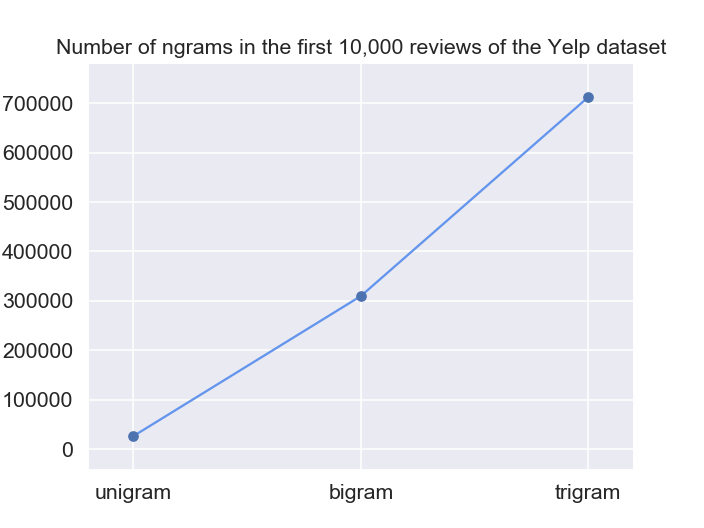

Text(0.5,1,'Number of ngrams in the first 10,000 reviews of the Yelp dataset')

In [21]:
# 그림 3-6
sns.set_style("darkgrid")
counts = [len(words), len(bigrams), len(trigrams)]
plt.plot(counts, color='cornflowerblue')
plt.plot(counts, 'bo')
plt.margins(0.1)
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in the first 10,000 reviews of the Yelp dataset', fontsize=14)

## Example 3-2. PoS tagging and chunking

In [22]:
# 처음 10개의 리뷰 로드
f = open('data/yelp/yelp_academic_dataset_review.json', encoding='utf-8')
js = []
for i in range(10):
    js.append(json.loads(f.readline()))
f.close()

review_df = pd.DataFrame(js)
review_df.shape

(10, 9)

### 1. spacy 사용 : [spacy 설치 가이드](https://spacy.io/docs/usage/)

In [23]:
import spacy

In [24]:
# model meta data
print(spacy.info('en'))


    Info about model en

    lang               en             
    pipeline           ['tagger', 'parser', 'ner']
    accuracy           {'token_acc': 99.8698372794, 'ents_p': 84.9664503965, 'ents_r': 85.6312524451, 'uas': 91.7237657538, 'tags_acc': 97.0403350292, 'ents_f': 85.2975560875, 'las': 89.800872413}
    name               core_web_sm    
    license            CC BY-SA 3.0   
    author             Explosion AI   
    url                https://explosion.ai
    vectors            {'keys': 0, 'width': 0, 'vectors': 0}
    sources            ['OntoNotes 5', 'Common Crawl']
    version            2.0.0          
    spacy_version      >=2.0.0a18     
    parent_package     spacy          
    speed              {'gpu': None, 'nwords': 291344, 'cpu': 5122.3040471407}
    email              contact@explosion.ai
    description        English multi-task CNN trained on OntoNotes, with GloVe vectors trained on Common Crawl. Assigns word vectors, context-specific token vectors, POS 

In [25]:
# 언어 모델 로드
nlp = spacy.load('en')

In [26]:
# 데이터 프레임에 적용
doc_df = review_df['text'].apply(nlp)
type(doc_df)

pandas.core.series.Series

In [27]:
type(doc_df[0])

spacy.tokens.doc.Doc

In [28]:
doc_df[4]

Delicious healthy food. The steak is amazing. Fish and pork are awesome too. Service is above and beyond. Not a bad thing to say about this place. Worth every penny!

In [29]:
# spaCy는 품사(.pos_)와 태그(.tag_)를 모두 제공
for doc in doc_df[4]:
    print(doc.text, doc.pos_, doc.tag_)

Delicious ADJ JJ
healthy ADJ JJ
food NOUN NN
. PUNCT .
The DET DT
steak NOUN NN
is VERB VBZ
amazing ADJ JJ
. PUNCT .
Fish NOUN NN
and CCONJ CC
pork NOUN NN
are VERB VBP
awesome ADJ JJ
too ADV RB
. PUNCT .
Service NOUN NN
is VERB VBZ
above ADV RB
and CCONJ CC
beyond ADP IN
. PUNCT .
Not ADV RB
a DET DT
bad ADJ JJ
thing NOUN NN
to PART TO
say VERB VB
about ADP IN
this DET DT
place NOUN NN
. PUNCT .
Worth ADJ JJ
every DET DT
penny NOUN NN
! PUNCT .


In [30]:
# spaCy는 명사구 추출 기능도 제공한다.
print([chunk for chunk in doc_df[4].noun_chunks])

[Delicious healthy food, The steak, Fish, pork, Service, Not a bad thing, this place]


### 2. Textblob 사용 : [설치 가이드](https://textblob.readthedocs.io/en/dev/)

In [31]:
from textblob import TextBlob

In [32]:
# Textblob에서는 기본값으로 PatternTagger를 사용하며, 이 예제에서는 이걸로 충분하다.
# NLTK tagger를 사용할 수도 있지만 이것은 불완전한 문장에 대해 더 잘 동작한다.

In [33]:
blob_df = review_df['text'].apply(TextBlob)

type(blob_df)

pandas.core.series.Series

In [34]:
type(blob_df[4])

textblob.blob.TextBlob

In [35]:
blob_df[4].tags

[('Delicious', 'NNP'),
 ('healthy', 'JJ'),
 ('food', 'NN'),
 ('The', 'DT'),
 ('steak', 'NN'),
 ('is', 'VBZ'),
 ('amazing', 'JJ'),
 ('Fish', 'NN'),
 ('and', 'CC'),
 ('pork', 'NN'),
 ('are', 'VBP'),
 ('awesome', 'JJ'),
 ('too', 'RB'),
 ('Service', 'NNP'),
 ('is', 'VBZ'),
 ('above', 'IN'),
 ('and', 'CC'),
 ('beyond', 'IN'),
 ('Not', 'RB'),
 ('a', 'DT'),
 ('bad', 'JJ'),
 ('thing', 'NN'),
 ('to', 'TO'),
 ('say', 'VB'),
 ('about', 'IN'),
 ('this', 'DT'),
 ('place', 'NN'),
 ('Worth', 'JJ'),
 ('every', 'DT'),
 ('penny', 'NN')]

In [36]:
# Textblob도 명사구 추출 가능
print([np for np in blob_df[4].noun_phrases])

['delicious', 'healthy food', 'fish', 'bad thing', 'worth']
